# Flight Delay Prediction
## Handling Imbalance in ArrDel15
- <strong>Environment Setup:</strong> import libraries and load the dataset
- <strong>Imbalanced Data Analysis:</strong> understanding the classifier performance metrics and the accuracy paradox
- <strong>Strategies:</strong> to handle the imbalanced dataset
    - <strong>Random Undersampling:</strong> 07_Random_Under_Sampling.ipynb
    - <strong>Random Oversampling:</strong> 08_Random_Under_Sampling.ipynb
    - <strong>SMOTE:</strong> 09_SMOTE.ipynb

## Environment Setup

In [1]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Data Partitioning
from sklearn.model_selection import train_test_split

df = pd.read_csv("Data/flight_and_weather_encoded.csv", index_col=0)

/home/nive/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
%%html
<style>
table {float:left}
</style>

## Imbalanced Data Analysis

An **imbalanced dataset** is one in which one class has disproportionate observations compared to the other classes. Each class in the dataset does not have an equal representation and imbalance causes the **skewed class distribution**.

### Accuracy Paradox
When we have a disproportionate representation of classes in a dataset, a model is likely to predict the majority class value for all predictions and achieve a high classification accuracy, also referred to as **Accuracy Paradox**.<br>

To ensure that the model works great in the real world, false positives and false negatives need to be kept to a minimum. Precision helps calculate the costs of false positives, and Recall helps understand the cost of false negatives. Hence precision, recall, and F1-score are better measures of a model’s performance.<br>

From the results, we have obtained, we can see that the classifier performance for the **Delayed (1.0)** observations is significantly worse. The Accuracy is unreliable since **79.04%** of the observations belong to the **Not Delayed (0.0)** class.

## Dataset Without Handling Imbalance

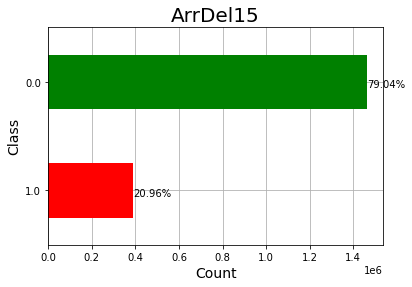

0.0    1463378
1.0     388058
Name: ArrDel15, dtype: int64


In [3]:
# Plotting the percentage of observations that fall under each class
ax = df["ArrDel15"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(df["ArrDel15"].value_counts())
fig = ax.get_figure()
fig.savefig("Img/06_01_Dataset_ArrDel15_Class_Imbalance.png")

In [4]:
features = df.loc[:, df.columns != "ArrDel15"]
labels = np.asarray(df["ArrDel15"])
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {df.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")
# print(f"{features_train.shape[1]} Features: {features_train.columns.to_list()}")
del features
del labels


Dataset shape: (1851436, 24)
features_train shape: (1481148, 23) | features_test shape: (370288, 23)
labels_train shape: (1481148,) | labels_test shape: (370288,)


### Performance Summary of the Different Classification Models
<table>
    <thead>
        <tr>
            <th rowspan="3">Classification Model</th>
            <th colspan="8">Performance Metric</th>
        </tr>
        <tr>
            <th colspan="2">Precision</th>
            <th colspan="2">Recall</th>
            <th colspan="2">F1 Score</th>
            <th rowspan="2" colspan="2">Accuracy</th>
        </tr>
        <tr>
            <th>0.0</th>
            <th>1.0</th>
            <th>0.0</th>
            <th>1.0</th>
            <th>0.0</th>
            <th>1.0</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>Logistic Regression</th>
            <td>0.92</td>
            <td>0.89</td>
            <td>0.98</td>
            <td>0.68</td>
            <td>0.95</td>
            <td>0.77</td>
            <td>0.92</td>
        </tr>
        <tr>
            <th>Decision Tree Classifier</th>
            <td>0.92</td>
            <td>0.68</td>
            <td>0.91</td>
            <td>0.71</td>
            <td>0.92</td>
            <td>0.69</td>
            <td>0.87</td>
        </tr>
        <tr>
            <th>Extra Trees Classifier</th>
            <td>0.93</td>
            <td>0.81</td>
            <td>0.96</td>
            <td>0.73</td>
            <td>0.94</td>
            <td>0.77</td>
            <td>0.91</td>
        </tr>
        <tr>
            <th>Gradient Boosting Classifier</th>
            <td>0.92</td>
            <td>0.90</td>
            <td>0.98</td>
            <td>0.68</td>
            <td>0.95</td>
            <td>0.78</td>
            <td>0.92</td>
        </tr>
        <tr>
            <th>Random Forest Classifier</th>
            <td>0.93</td>
            <td>0.88</td>
            <td>0.97</td>
            <td>0.70</td>
            <td>0.95</td>
            <td>0.78</td>
            <td>0.92</td>
        </tr>
    </tbody>
</table>

### Metrics  for Imbalanced Data
|Performance Metric|Inference|
|:-|:-|
|**Accuracy of the model**|Is basically the total number of correct predictions divided by total number of predictions|
|**Precision of a class**|Defines how trustable the result is when the model answers that a point belongs to that class|
|**Recall of a class**|Expresses how well the model is able to detect that class|
|**F1 of a class**|Is given by the harmonic mean of precision and recall and combines them into one metric|

### Understanding these Metrics
||High Recall|Low Recall|
|:-|:-|:-|
|**High Precision**|The class is perfectly handled by the model|The model can’t detect the class well but is highly trustable when it does|
|**Low Precision**|The class is well detected but the model also include points of other classes in it|The class is poorly handled by the model|

## Strategies





|Strategy|What happens?|
|:-|:-|
|**Under-sampling**|Under-sampling or down-sampling the majority class where the observations of the majority class are randomly removed to reduce its influence on the machine learning algorithm.|
|**Over-sampling**|Over-sampling or up-sampling, the minority class where the observations for the minority class is randomly duplicated to increase the influence on the machine learning algorithm.|
|**SMOTE**|Creating synthetic data for the minority class using SMOTE(Synthetic Minority over-sampling Technique). SMOTE takes random samples from the minority class, finds its nearest k neighbors, and then selects a point between the randomly selected data point and its nearest k neighbors to generate synthetic data.|